In [16]:
from sketch import SketchKNN
import matplotlib.pyplot as plt 
import numpy as np
from functools import partial

from sklearn.metrics import pairwise_distances_chunked
from sklearn.utils.validation import check_is_fitted
from sklearn.utils import check_array, check_random_state
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, UnsupervisedMixin
from sklearn.utils._joblib import effective_n_jobs
from sklearn.decomposition import PCA
import math

In [17]:
data = np.load("../data/Caltech101_small.npy")
neigh = SketchKNN(n_neighbors=5, sketch_size = 20, random_state = 0)
neigh.fit(data)
dists, neight_inds = neigh.kneighbors(data[:2,:], sketch_method = 'PCA', return_distance=True, candidates_scale = 20)
print("distance: ", dists)
print("neight_inds: ", neight_inds)

distance:  [array([  0.        , 229.41447208, 241.71057072, 245.09793961,
       245.97560855]), array([  0.        , 265.04905206, 277.91185653, 278.74899103,
       281.18677067])]
neight_inds:  [array([   0, 5661, 4373, 5660, 4359]), array([  1, 125, 173,  53,  35])]


true Index:  [[0, 5661, 4373, 5660, 4359]]
[array([   0, 2951, 4760, 4915, 5588])]
[array([   0, 6061, 4521, 4259, 2951])]
[array([   0, 5660, 4053, 4191, 7029])]
[array([   0, 2951, 5588, 4805, 3904])]
[array([   0, 2951, 5588, 4805, 4216])]
[array([   0, 5660, 4191, 7029, 2574])]
[array([   0, 1845, 5341,  312, 4222])]
[array([   0, 2597, 1845, 5341, 4208])]
[array([   0,  349, 3855,  907, 5351])]
[array([   0, 5661, 4373, 5660, 4359])]
[array([   0, 5661, 4373, 5660, 4359])]
[array([   0, 5661, 4373, 5660, 4359])]


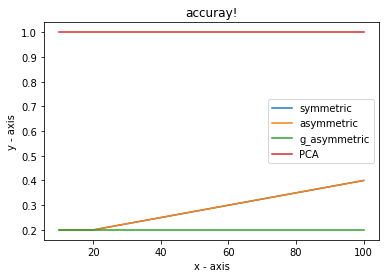

In [37]:


domain1 = [10,20,100];
resultAccuracy = []
len_query = 5
dists, trueIndex = neigh.kneighbors(data[:1,:],n_neighbors = len_query, return_distance=True, candidates_scale = 20)
trueIndex = trueIndex.tolist();
print("true Index: ",trueIndex)
top = 0;
end = len(domain1)
for i in domain1:   
    dists, result = neigh.kneighbors(data[:1,:],n_neighbors = len_query, sketch_method = 'symmetric', return_distance=True, candidates_scale = i)
    print(result)
    for re_list in result:
        top = 0;
        for j in trueIndex:
            for element in j:
                if element in re_list:
                    top += 1
        resultAccuracy.append(top/len_query) 
        
y1 = resultAccuracy 
    
    
# line 1 points 
x1 = domain1 
# plotting the line 1 points  
plt.plot(x1, y1, label = "symmetric") 

resultAccuracy = []
top = 0;
end = len(domain1)
for i in domain1:   
    dists, result = neigh.kneighbors(data[:1,:],n_neighbors = len_query, sketch_method = 'asymmetric', return_distance=True, candidates_scale = i)
    print(result)
    for re_list in result:
        top = 0;
        for j in trueIndex:
            for element in j:
                if element in re_list:
                    top += 1
        resultAccuracy.append(top/len_query) 
         
y2 = resultAccuracy  
# line 2 points 
x2 = domain1 
# plotting the line 2 points  
plt.plot(x2, y2, label = "asymmetric") 

resultAccuracy = []
top = 0;
end = len(domain1)
for i in domain1:   
    dists, result = neigh.kneighbors(data[:1,:],n_neighbors = len_query, sketch_method = 'g_asymmetric', return_distance=True, candidates_scale = i)
    print(result)
    for re_list in result:
        top = 0;
        for j in trueIndex:
            for element in j:
                if element in re_list:
                    top += 1
        resultAccuracy.append(top/len_query) 
         
y3 = resultAccuracy  
# line 2 points 
x3 = domain1
# plotting the line 2 points  
plt.plot(x3, y3, label = "g_asymmetric")


resultAccuracy = []
top = 0;
end = len(domain1)
for i in domain1:   
    dists, result = neigh.kneighbors(data[:1,:],n_neighbors = len_query, sketch_method = 'PCA', return_distance=True, candidates_scale = i)
    print(result)
    for re_list in result:
        top = 0;
        for j in trueIndex:
            for element in j:
                if element in re_list:
                    top += 1
        resultAccuracy.append(top/len_query) 
         
y4 = resultAccuracy  
# line 2 points 
x4 = domain1
# plotting the line 2 points  
plt.plot(x4, y4, label = "PCA")
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
# giving a title to my graph 
plt.title('accuray!') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show() 













In [ ]:
import time
domain1 = [10,50,100];
resultRunningTime = []
top = 0;
end = len(domain1)
for i in domain1:
    start_time = time.time()
    result = some_function(i)
    resultRunningTime.append(time.time() - start_time)
         
y1 = resultRunningTime  



# line 1 points
x1 = domain1

# plotting the line 1 points  
plt.plot(x1, y1, label = "line 1") 


resultRunningTime = []
top = 0;
end = len(domain1)
for i in domain1:
    start_time = time.time()
    result = some_function(i)
    resultRunningTime.append(time.time() - start_time)
         
y2 = resultRunningTime  

# line 2 points 
x2 = domain1 
# plotting the line 2 points  
plt.plot(x2, y2, label = "line 2") 


resultRunningTime = []
top = 0;
end = len(domain1)
for i in domain1:
    start_time = time.time()
    result = some_function(i)
    resultRunningTime.append(time.time() - start_time)
         
y3 = resultRunningTime  

# line 2 points 
x3 = domain1

# plotting the line 2 points  
plt.plot(x3, y3, label = "line 3")



resultRunningTime = []
top = 0;
end = len(domain1)
for i in domain1:
    start_time = time.time()
    result = some_function(i)
    resultRunningTime.append(time.time() - start_time)
         
y4 = resultRunningTime  

# line 2 points 
x4 = domain1
# plotting the line 2 points  
plt.plot(x4, y4, label = "line 4")
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
# giving a title to my graph 
plt.title('runnung time!') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show() 
